# Mark 12

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import color

# Functions

In [114]:
def all_to_rgb(imgs:dict)->dict:
    '''
    Ubah citra dari BGR ke RGB.
    
    :params imgs: Citra BGR
    :returns: Citra RGB (dict)
    '''
    rgb_imgs = {}
    for img in imgs:
        rgb_imgs[img] = cv2.cvtColor(imgs[img], cv2.COLOR_BGR2RGB)
    return rgb_imgs

def resize_all(imgs:dict, scale:int)->dict:
    '''
    Resize semua citra berdasarkan sebuah nilai.
    
    :params imgs: Citra
    :params scale: Angka resizer
    
    :returns: Citra resized (dict)
    '''
    resized = {}
    for img in imgs:
        dim = (int(imgs[img].shape[1]*scale/100), int(imgs[img].shape[0]*scale/100))
        resized[img] = cv2.resize(imgs[img], dim, interpolation=cv2.INTER_AREA)
    return resized

def display_all(imgs:dict, use_gray:bool=False)->None:
    '''
    Tampilkan semua citra dalam dictionary.
    
    :params imgs: Citra
    :params use_gray: Gunakan grayscale
    
    :returns: None
    '''
    fig, axs = plt.subplots(1, len(imgs),figsize=(18, 10))
    for i, img in enumerate(imgs):
        axs[i].imshow(imgs[img])
        axs[i].set_title(img)
        
def display_all_with(imgs:dict, cc:int=0, use_gray:bool=True)->None:
    '''
    Tampilkan citra dengan color channel yang spesifik
    
    :params imgs: citra
    :params cc: color channel
    :params use_gray: tampilkan dengan grayscale
    
    :return:
    None
    '''
    fig, axs = plt.subplots(1, len(imgs), figsize=(18,10))
    for i, img in enumerate(imgs):
        if use_gray:
            axs[i].imshow(imgs[img][:,:,cc], cmap='gray')
        else:
            axs[i].imshow(imgs[img])
        axs[i].set_title(img)

def extract_roi(imgs:dict, wlim:int=80) -> dict:
    '''
    Ekstrak ROI
    
    :params imgs: citra
    :params wlim: limit width ROI
    
    :returns:
    ROI dict
    '''
    rois = {}
    for img in imgs:
        if imgs[img].shape[0] < 160:
            rois[img] = imgs[img]
        else:
            gray_c= color.rgb2gray(imgs[img])
            xmax = cv2.minMaxLoc(gray_c)[3][0]
            ymax = cv2.minMaxLoc(gray_c)[3][1]
            print(xmax, ymax)
            rois[img] = imgs[img][ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]
    return rois

def preprocess_all(imgs:dict)->dict:
    '''
    Preprocess semua citra dalam dictionary
    
    :params imgs: Citra
    :returns: Citra preprocessed (dict)
    '''
    preprocessed = {}
    for img in imgs:
        imgs[img][:,:,0] = imgs[img][:,:,0]*0.5
        img_hsv = color.rgb2hsv(imgs[img])
        img_hsv[:,:,2] = exposure.adjust_gamma(img_hsv[:,:,2], 1.2)
        img_rgb = color.hsv2rgb(img_hsv)
        img_rgb[:,:,1] = exposure.equalize_adapthist(img_rgb[:,:,1], clip_limit=0.001)
        preprocessed[img] = img_rgb
    return preprocessed
    

def get_od_segmentation(imgs)->dict:
    '''
    Segmentasi Optic Disc (OD)
    
    :params imgs: Citra
    
    ubah ke hsv
    setelah itu jalankan CHT
    setor gambar baru (binary) berisi lingkaran ke dict od
    '''
    od = {}
    for img in imgs:
        gray_roi = cv2.cvtColor(imgs[img], cv2.COLOR_RGB2GRAY)
        blurred = cv2.medianBlur(gray_roi, 25)
        roi = cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)
        # hinhsv = np.uint8(hsv_roi[:,:2])
        # blurred = cv2.medianBlur(hsv_roi[:,:,2].astype('float32'),25)
        circles = cv2.HoughCircles(roi,
                                   cv2.HOUGH_GRADIENT,
                                   1,
                                   26,
                                   param1=100,
                                   param2=30,
                                   minRadius=0,
                                   maxRadius=0)
        print(circles)
        break
        # od[img] = np.zeros_like(hsv_roi[:,:,2])
        # od[img] = cv2.circle(img=od[img], 
        #                      center=(int(circles[0][0][0]),int(circles[0][0][1])), 
        #                      radius=int(circles[0][0][2]), 
        #                      color=(255,255,255), 
        #                      thickness=-1)
    return od

# Data

In [115]:
all_imgs = {
    'hrf': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg'),
    'dgs': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_drishti.png'),
    'rm': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_rm.png')
}

# Preprocess

In [116]:
rgb_imgs = all_to_rgb(all_imgs)

In [117]:
resized_imgs = resize_all(rgb_imgs, 30)

In [118]:
pres = preprocess_all(resized_imgs)

In [119]:
roi = extract_roi(pres)

293 353
428 306


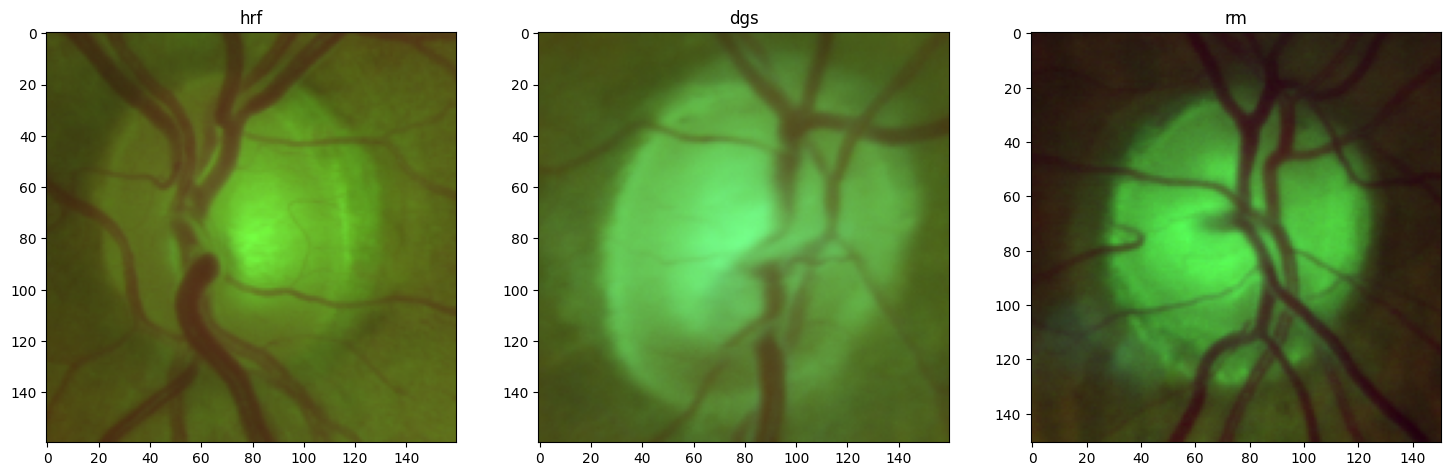

In [120]:
display_all(roi)

In [107]:
od = get_od_segmentation(roi)

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/hough.cpp:2257: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'HoughCircles'


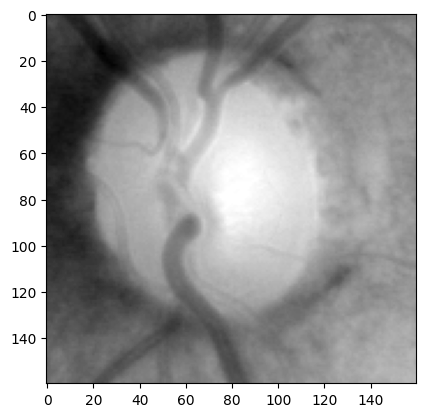

In [109]:
plt.imshow(roi['hrf'][:,:,0], cmap='gray')